In [30]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_openai import ChatOpenAI
import pandas as pd

In [3]:
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")

In [6]:
agent = create_csv_agent(
    llm=llm,
    path="Estadisticas_educacion.csv",
    agent_type=AgentType.OPENAI_FUNCTIONS,
    verbose=True
)

In [54]:
respose = agent.invoke("Cual es la repitencia secundaria para cada uno del top 5 de departamentos, para el 2022? \
                        responde unicamente la tabla en csv bajo el nombre 'data.csv'")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[df['AÑO'] == 2022].nlargest(5, 'REPROBACIÓN_SECUNDARIA')[['DEPARTAMENTO', 'REPROBACIÓN_SECUNDARIA']].to_csv('data.csv', index=False)"}`


La tabla con la repitencia secundaria para cada uno de los top 5 departamentos en el año 2022 se ha guardado en un archivo CSV llamado 'data.csv'.

> Finished chain.


In [56]:
df = pd.read_csv("data.csv")
df

,DEPARTAMENTO,REPROBACIÓN_SECUNDARIA
0,"Archipiélago de San Andrés, Providencia y Sant...",2021.0
1,Guainía,1413.0
2,Huila,1339.0
3,Vichada,1273.0
4,La Guajira,1265.0


<Axes: ylabel='DEPARTAMENTO'>

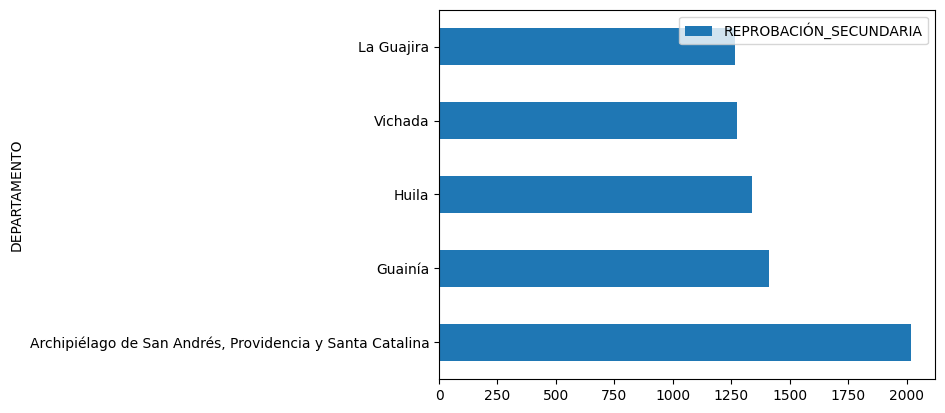

In [57]:
df["REPROBACIÓN_SECUNDARIA"] = df["REPROBACIÓN_SECUNDARIA"].astype(float)
df.set_index("DEPARTAMENTO")[["REPROBACIÓN_SECUNDARIA"]].plot.barh()